# Basics on Python and Quantum Computing
###### By: J. A. Orduz-Ducuara

## Classical model world with data! It is not Working

We import the libraries or modules

120


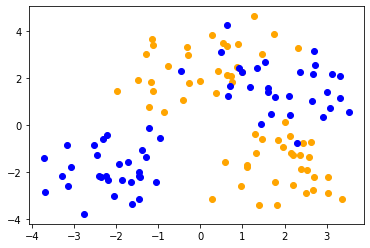

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n_samples = 30 * 4

A = np.array([[np.random.normal(loc=0), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
B = np.array([[np.random.normal(loc=2), np.random.normal(loc=-2)] for i in range(n_samples//4)]) 
C = np.array([[np.random.normal(loc=2), np.random.normal(loc=2)] for i in range(n_samples//4)]) 
D = np.array([[np.random.normal(loc=-2), np.random.normal(loc=-2)] for i in range(n_samples//4)])

feature = np.concatenate([A, B,C,D], axis=0)/4
label = np.concatenate([-np.ones(n_samples // 2), np.ones(n_samples//2)], axis=0)
data = list(zip(feature, label))

np.random.shuffle(data)
print(len(data))
plt.scatter(A[:,0], A[:,1], color = "orange")
plt.scatter(B[:,0], B[:,1], color = "orange")
plt.scatter(C[:,0], C[:,1], color = "blue")
plt.scatter(D[:,0], D[:,1], color = "blue")
plt.show()

We introduce a line to draw the graphs in the nb

In [2]:
porcentaje_train = 0.5
m = int(porcentaje_train * n_samples)


x_train = np.array([data[i][0] for i in range(m)])
y_train = np.array([data[i][1] for i in range(m)])

x_test = np.array([data[i][0] for i in range(m,n_samples)])
y_test = np.array([data[i][1] for i in range(m,n_samples)])



We plot the data set

In [54]:
import pennylane as qml
import matplotlib.pyplot as plt
from time import time
import scipy
from pennylane import numpy as np    

In [55]:
n = len(x_train[0])

@qml.template
def feature_map(x):
    
    # ZZMap modificado

    for i in range(2):
        qml.Hadamard(wires = i)


    qml.RZ(2*x[0], wires = 0)
    qml.RZ(2*x[1], wires = 1)
    qml.CNOT(wires = [0,1])
    qml.RZ(2*(np.pi - x[0])*(np.pi - x[1]), wires = 1)
    qml.CNOT(wires = [0,1])
    

In [56]:
 dev = qml.device("default.qubit", wires = n) 
@qml.qnode(dev)
def circuit(x,y):
    feature_map(y)
    qml.adjoint(feature_map)(x)
#    return qml.expval(qml.PauliY(0))
    return qml.probs(wires = range(n))

In [50]:
# devuelve el valor final del producto interno
def scalar_product(x,y):
    probs = circuit(x,y)
    return probs[0]

In [51]:
def KernelGramMatrixFull(X1, X2):
    print("Calculando matriz de Gram")


    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        print(int(i / len(X1) *100), "%")
        for j, x2 in enumerate(X2):
            
            x1 = x1.flatten()
            x2 = x2.flatten()
            
            gram_matrix[i, j] = scalar_product(x1,x2)
            
    return gram_matrix

In [52]:
from sklearn import svm

clf = svm.SVC(kernel="precomputed")

In [53]:
matrix = KernelGramMatrixFull(x_train,x_train)


Calculando matriz de Gram
0 %


AttributeError: module 'pennylane' has no attribute 'adjoint'

In [ ]:
print("Entrenando...")
clf.fit(matrix, y_train)

In [3]:


#test
print("Comprobando con test...")

sol = clf.predict(KernelGramMatrixFull(x_test,x_train))

success = 0
for i in range(len(y_test)):
    if sol[i] == y_test[i]:
        success += 1
        
print("Precisión del test: ", success/len(sol)*100, "%")

Calculando matriz de Gram
0 %


AttributeError: module 'pennylane' has no attribute 'adjoint'

We assign -1 to yellow, and 1 to blue points.

In [4]:
print("predicción:")

for i in range(len(x_test)):
    color = "blue"
    if sol[i] == -1:
        color = "orange"
    
    plt.scatter(x_test[i,0], x_test[i,1], color = color)
    
plt.show()

print("real:")
for i in range(len(x_test)):
    color = "blue"
    if y_test[i] == -1:
        color = "orange"
    
    plt.scatter(x_test[i,0], x_test[i,1], color = color)
    
plt.show()

Values should between ``[-1, 1]``, therefore we introduce a factor, ``factorNorm.`` In addition, use the function $x_0 \omega_0 + x_1 \omega_1 +\omega_2$

In [5]:
def model(x, w):
    return np.arctan(x[0]*w[0] + x[1]*w[1] + w[2]) / (np.pi / 2)

We

In [6]:
limit = np.pi
x = np.arange(-limit, limit, 0.2)
y = np.arange(-limit, limit, 0.2)

# Calculating the output and storing it in the array Z

def plot(f):
    Z = np.zeros([len(x), len(y)])
    for ind, i in enumerate(x):
        for ind2, j in enumerate(y):
            Z[ind,ind2] = f([i, j],w)

    im = plt.imshow(Z, extent=(-limit, limit, -limit, limit), interpolation='bilinear')
    plt.scatter(A[:,0], A[:,1], color = "orange")
    plt.scatter(B[:,0], B[:,1], color = "orange")
    plt.scatter(C[:,0], C[:,1], color = "blue")
    plt.scatter(D[:,0], D[:,1], color = "blue")
    plt.axis((-limit,limit,-limit,limit))
    plt.colorbar(im);

    plt.show()
    

We compute the error

In [7]:
def average_loss(w, data):
    losses = 0
    for x,y in data:
        losses += (model(x,w) - y) ** 2
    return losses/len(data)

In [8]:
gradient_fn_w = qml.grad(average_loss, argnum=0)

We train

epoch 0 loss 1.2938323094337134


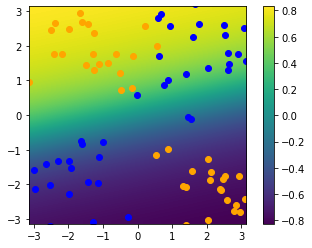

epoch 5 loss 1.2360391408241516


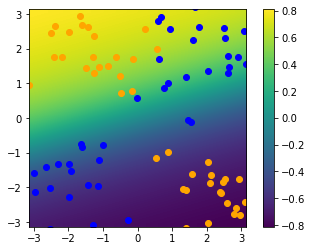

epoch 10 loss 1.162220619482424


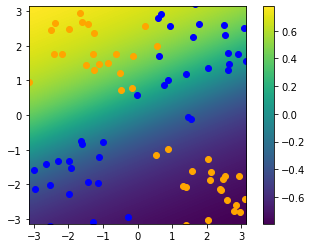

epoch 15 loss 1.091414005463201


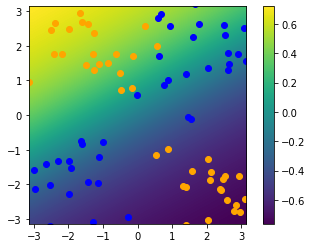

epoch 20 loss 1.0425261809268758


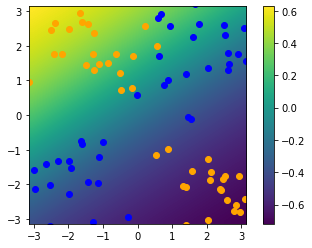

epoch 25 loss 1.020503384404563


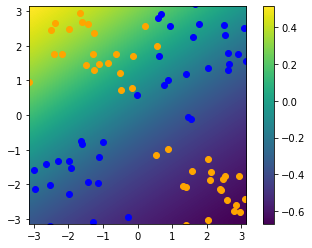

epoch 30 loss 1.0146951774998738


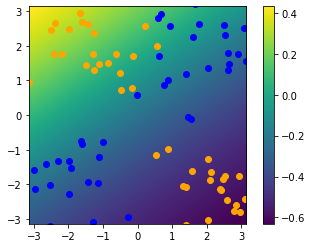

epoch 35 loss 1.012442334555946


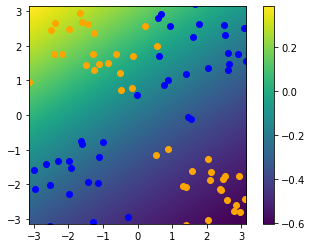

epoch 40 loss 1.0102443631322253


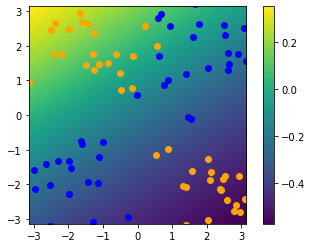

epoch 45 loss 1.0075836699333292


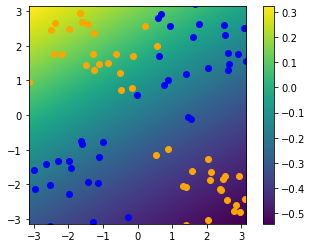

epoch 50 loss 1.0043241060273123


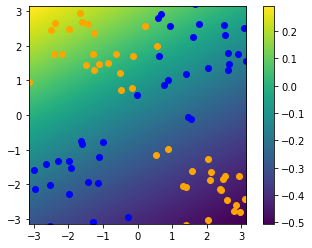

epoch 55 loss 1.000431408582382


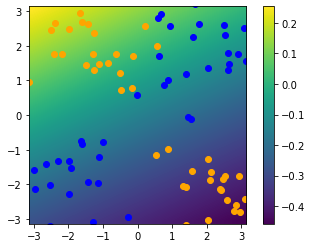

epoch 60 loss 0.9960734804721966


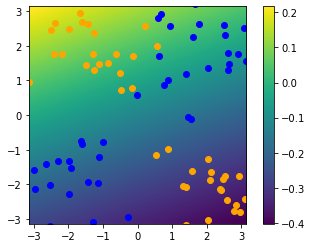

epoch 65 loss 0.9917324399338625


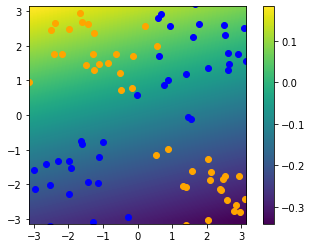

epoch 70 loss 0.9880462138586935


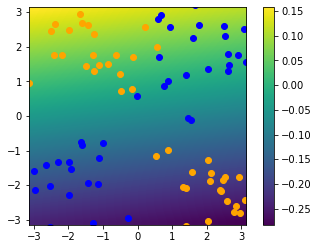

epoch 75 loss 0.985373725484094


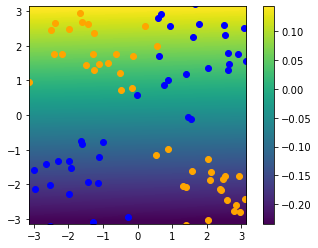

epoch 80 loss 0.9836401392470335


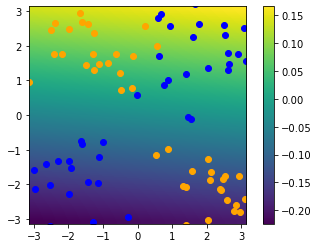

epoch 85 loss 0.9825789193931351


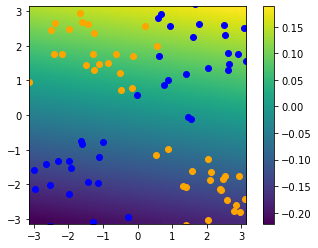

epoch 90 loss 0.9819441691435769


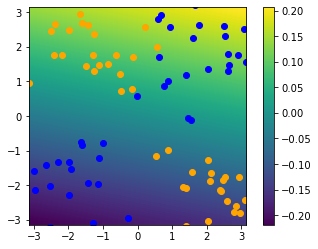

epoch 95 loss 0.9815664988912125


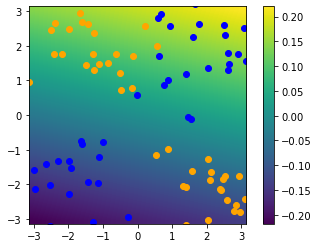

epoch 100 loss 0.981341124336495


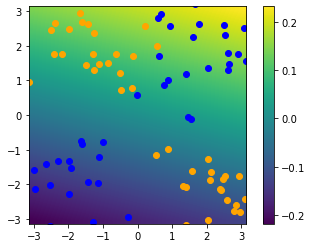

In [9]:
from IPython.display import clear_output
w = np.array([-1., -0.2, 0.,0.5], requires_grad = True)

lr = 0.1
for epoch in range(101):
    w = w - lr*gradient_fn_w(w,data)
    if epoch % 5 == 0:
        print("epoch", epoch, "loss", average_loss(w,data))
        plot(model)
        #clear_output(wait=True)

# References


1. Qiskit tutorial: https://tinyurl.com/y6mh4bq8